In [2]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
import time
import matplotlib.pyplot as plt

In [8]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'
res = requests.get(url)
vacancies1 = res.json()
#Всего найдено вакансий
All_Vac = vacancies1.get('found')
print(All_Vac)

4031


In [7]:
today = datetime.now().date()
#date_to = str(today)
#date_from = today + timedelta(days=-i*10)
#a = a + timedelta(days=-30)
#b = print(a)\
# i = 3
# date_to = str(today + timedelta(days=-i*10))
# i = i + 1
# date_from = str(today + timedelta(days=-i*10))
# print(date_to)
# print(date_from)

In [9]:
Get_Vac = 0
i = 0
all_vacancy_ids = []
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'
res = requests.get(url)
vacancies1 = res.json()
#Всего найдено вакансий
All_Vac = vacancies1.get('found')
print(All_Vac)
while (Get_Vac < All_Vac):
    date_to = str(today + timedelta(days=-i*6))
    i = i + 1
    date_from = str(today + timedelta(days=-i*6))
    publication_time = 'publication_time'
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&date_from={date_from}&date_to={date_to}&vacancy_search_order={publication_time}'
    res = requests.get(url)
    vacancies1 = res.json()
    vnum  = vacancies1.get('pages')
    for ii in tqdm(range(vnum)):
        url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={ii}&per_page={num_per_page}&date_from={date_from}&date_to={date_to}&vacancy_search_order={publication_time}'
        res = requests.get(url)
        vacancies = res.json()
        vacancy_ids = [el.get('id') for el in vacancies.get('items')]
        all_vacancy_ids.extend(vacancy_ids)
    all_vacancy_ids1 = []
    for x in all_vacancy_ids:
        if x not in all_vacancy_ids1:
            all_vacancy_ids1.append(x)
    Get_Vac = len(all_vacancy_ids1)
    print(Get_Vac)

4031


  0%|          | 0/16 [00:00<?, ?it/s]

1599


  0%|          | 0/11 [00:00<?, ?it/s]

2415


  0%|          | 0/8 [00:00<?, ?it/s]

3011


  0%|          | 0/8 [00:00<?, ?it/s]

3715


  0%|          | 0/4 [00:00<?, ?it/s]

4031


In [12]:
all_vacancy = []
for ii in tqdm(all_vacancy_ids1):
    url = f'https://api.hh.ru/vacancies/{ii}'
    res = requests.get(url)
    vacancies = res.json()
    all_vacancy.append(vacancies)
    time.sleep(0.1)

  0%|          | 0/4031 [00:00<?, ?it/s]

In [71]:
df = pd.json_normalize(all_vacancy)

In [75]:
#Убираем столбцы и строки с Nan
df = df.dropna(axis=0, thresh=11)
df = df.dropna(axis=1, how='all')

In [ ]:
#Переведите даты публикаций в datetime

In [80]:
vacancy_date = df.drop(['premium', 'relations', 'response_letter_required', 'allow_messages', 'description', 'branded_description', 'accept_handicapped', 'accept_kids', 'archived', 'response_url','specializations', 'professional_roles', 'code', 'hidden','quick_responses_allowed', 'driver_license_types','accept_incomplete_resumes', 'created_at','initial_created_at', 'apply_alternate_url', 'has_test','alternate_url', 'working_days', 'working_time_intervals','working_time_modes', 'accept_temporary', 'languages','billing_type.id', 'billing_type.name', 'area.id', 'area.name','area.url', 'salary.from', 'salary.to', 'salary.currency','salary.gross', 'type.id', 'type.name', 'experience.id','experience.name', 'schedule.id', 'schedule.name', 'employment.id','employment.name', 'employer.id', 'employer.name', 'employer.url','employer.alternate_url', 'employer.logo_urls.original','employer.logo_urls.90', 'employer.logo_urls.240','employer.vacancies_url', 'employer.trusted', 'address.city','address.street', 'address.building', 'address.lat', 'address.lng','address.raw', 'address.metro.station_name', 'address.metro.line_name','address.metro.station_id', 'address.metro.line_id','address.metro.lat', 'address.metro.lng', 'address.metro_stations','immediate_redirect_url', 'test.required'], axis=1)

In [81]:
vacancy_date.published_at = pd.to_datetime(vacancy_date.published_at)

In [82]:
vacancy_date['published_date'] = vacancy_date.published_at.dt.date

In [83]:
vacancy_date = vacancy_date.drop(['published_at'], axis=1)

In [84]:
vacancy_date.head(10)

,id,name,key_skills,published_date
0,55415805,Менеджер по работе с клиентами,[],2022-07-27
1,67541509,Клиентский менеджер Сбербанк Премьер,[],2022-07-27
2,45790891,Менеджер по работе с ключевыми клиентами малог...,"[{'name': 'Прямые продажи'}, {'name': 'Финансо...",2022-07-27
3,55415496,Клиентский менеджер прямых продаж,[],2022-07-27
4,67349462,Старший клиентский менеджер,[],2022-07-25
5,67241244,Специалист контактного центра,[],2022-07-25
6,68202144,Стажер-тестировщик,"[{'name': 'SQL'}, {'name': 'Функциональное тес...",2022-07-27
7,55889794,Финансовый консультант,[],2022-07-27
8,54685410,Ведущий специалист по взысканию,[],2022-07-25
9,45381514,Менеджер по привлечению корпоративных клиентов,"[{'name': 'Холодные продажи'}, {'name': 'Поиск...",2022-07-26


In [85]:
#Постройте график опубликованных вакансий по датам

In [86]:
vacancy_date = vacancy_date.set_index('published_date')

In [87]:
vacs = vacancy_date.groupby('published_date')['id'].count().reset_index()

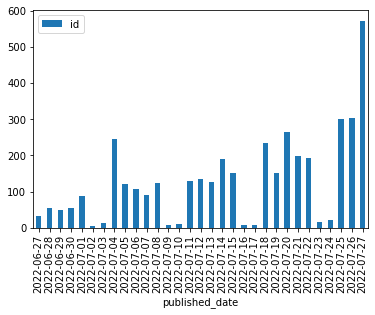

In [88]:
vacs.set_index('published_date').plot(kind='bar');

In [89]:
#Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий

In [90]:
vacancy_date_week = vacancy_date.drop(['key_skills','name'], axis=1).reset_index()

In [91]:
vacancy_date_week['day_of_week'] = pd.to_datetime(vacancy_date_week['published_date']).dt.day_name()

In [92]:
vacancy_date_week['day_of_week']

0       Wednesday
1       Wednesday
2       Wednesday
3       Wednesday
4          Monday
          ...    
3995       Friday
3996     Saturday
3997      Tuesday
3998     Thursday
3999     Thursday
Name: day_of_week, Length: 4000, dtype: object

In [93]:
vacs_day_week = vacancy_date_week.groupby('day_of_week')['id'].count().reset_index()

In [94]:
vacs_day_week.loc[vacs_day_week['id'] == vacs_day_week['id'].max()]

,day_of_week,id
6,Wednesday,1123


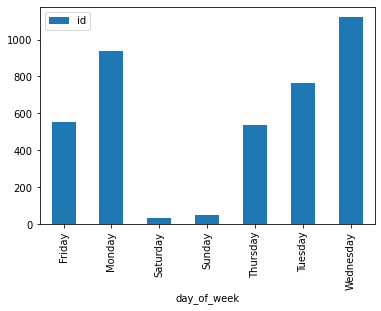

In [95]:
vacs_day_week.set_index('day_of_week').plot(kind='bar');

In [122]:
#Преобразуем key_skills в строку

In [123]:
df1 = vacancy_date.reset_index()

In [124]:
slist4= (df1.key_skills).to_list()

In [209]:
slist3 = []
for lns in slist4:
    el = [x.get('name') for x in lns]
    slist3.append(",".join(el))    

In [210]:
sskils = pd.Series(slist3)

In [211]:
df1['skils'] = sskils

In [212]:
vac_skills = df1.drop(['key_skills'], axis=1)

In [213]:
#Найдите те вакансии с использованием python, которые вам интересны

In [214]:
python_s = 'python'
ps1 = vac_skills.skils.str.lower().str.contains(python_s)

In [215]:
vacancy_interest = vac_skills[ps1]

In [216]:
vacancy_interest

,published_date,id,name,skils
34,2022-07-25,68125720,Аналитик данных,"Python,SCALA,Big Data,SQL,Java"
73,2022-07-25,68123813,Дата аналитик,"SQL,Python"
106,2022-07-26,68148229,Data Scientist (SberDevices),"PyTorch,Tensorflow,Python,Deep Learning,NLP"
191,2022-07-26,68161138,QA инженер (Рекомендательная платформа),"Python,Git,SQL,QA"
221,2022-07-25,68115103,Data Scientist,"Python,Hadoop,Spark,SQL,Docker"
...,...,...,...,...
3973,2022-06-28,67300025,DevOps инженер,"Linux,Git,Jenkins,Java,Python"
3987,2022-06-29,67343184,MLOps Engineer в области рекомендательных систем,"Python,Git,SQL,PostgreSQL,Atlassian Jira,PyTor..."
3989,2022-06-29,67325371,DevOps-инженер (система Поток Продаж),"Python,Git,Linux,PostgreSQL,SQL"
3993,2022-06-30,49792719,DevOps инженер собственной сборки,"Python,Linux,Atlassian Jira,Atlassian Confluen..."


In [217]:
#Определите по полю skills какие навыки больше всего востребованы для этих вакансий

In [218]:
slist2= (vacancy_interest.skils).to_list()

In [220]:
slist3 = []
for lns in slist2:
        for el in lns.split(','):
            slist3.append(el)

In [221]:
df2_skills = pd.DataFrame({'skills': slist3})

In [222]:
df2_skills['repeat'] = 1

In [223]:
Python_Skills = df2_skills.groupby('skills')['repeat'].count().reset_index()

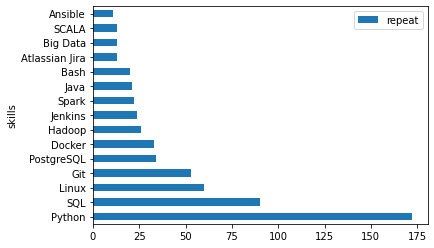

In [224]:
#Наиборее востребованные навыки для вакансий с python
Python_Skills.nlargest(15, 'repeat').set_index('skills').plot(kind='barh');

In [225]:
#Все вакансии датааналитика
ta1 = vac_skills.name.str.lower().str.contains('data')
ta11 = vac_skills.name.str.lower().str.contains('дата')
ta2 = vac_skills.name.str.lower().str.contains('аналитик')
ta22 = vac_skills.name.str.lower().str.contains('analyst')

In [226]:
#Постройте график наиболее востребованных навыков для аналитика данных
vac_DA = vac_skills[(ta1|ta11)&(ta22|ta2)]

In [228]:
slist2= (vac_DA.skils).to_list()

In [237]:
slist3 = []
for lns in slist2:
    if len(lns)!=0:
        for el in lns.split(','):
            slist3.append(el)

In [238]:
df2 = pd.DataFrame({'skills': slist3})

In [239]:
df2['repeat'] = 1

In [240]:
DA_Skills = df2.groupby('skills')['repeat'].count().reset_index()

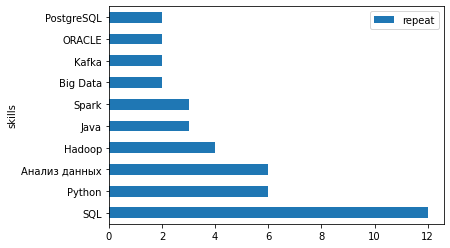

In [241]:
#Наиборее востребованные навыки для DA
DA_Skills.nlargest(10, 'repeat').set_index('skills').plot(kind='barh');